In [392]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [341]:
import nltk
from nltk.corpus import stopwords

In [388]:
from sklearn.model_selection import  train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [342]:
df = pd.read_csv('/Users/ibrahim/Documents/data/advertising.csv')

In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   Male                      1000 non-null   int64  
 6   Clicked on Ad             1000 non-null   int64  
 7   Time                      1000 non-null   int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 62.6+ KB


In [343]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [399]:
corrl = df.corr(numeric_only=True)

<Axes: >

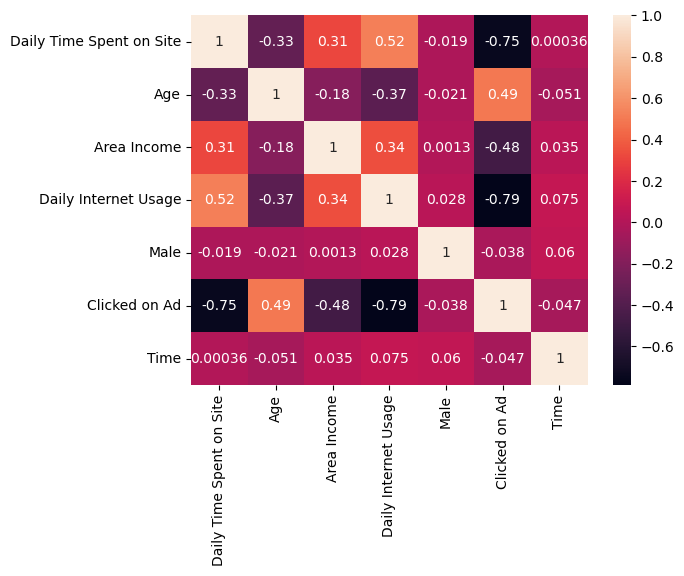

In [401]:
sns.heatmap(corrl,annot=True)

array([[<Axes: title={'center': 'Daily Time Spent on Site'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Area Income'}>],
       [<Axes: title={'center': 'Daily Internet Usage'}>,
        <Axes: title={'center': 'Male'}>,
        <Axes: title={'center': 'Clicked on Ad'}>],
       [<Axes: title={'center': 'Time'}>, <Axes: >, <Axes: >]],
      dtype=object)

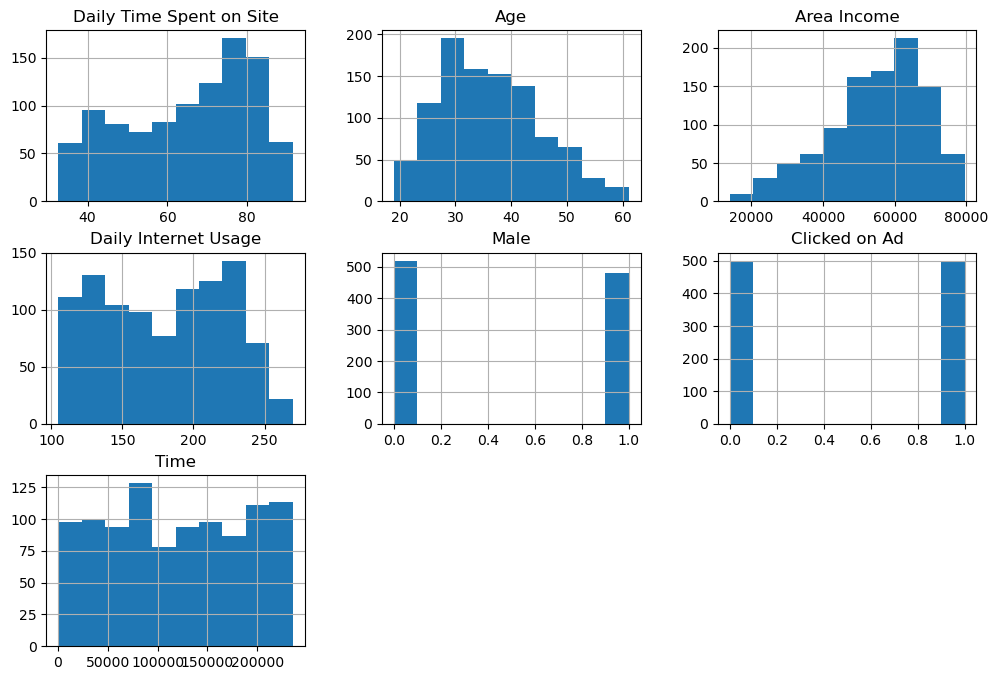

In [404]:
df.hist(figsize=[12,8])

In [435]:
df[df['Male'] == 1].value_counts().sum()

481

In [436]:
df[df['Male'] == 0].value_counts().sum()

519

<Axes: xlabel='Age', ylabel='Area Income'>

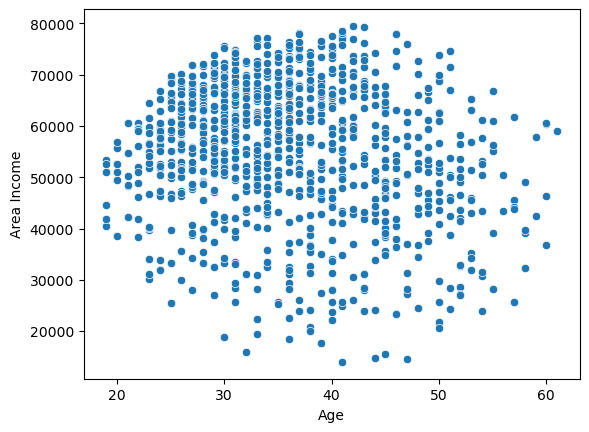

In [418]:
sns.scatterplot(x='Age',y='Area Income',data=df)

In [419]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Time
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000,119535.196000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025,69594.679979
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000,48.000000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000,61417.500000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000,120551.500000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000,182533.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000,235906.000000


<Axes: xlabel='Clicked on Ad', ylabel='Daily Time Spent on Site'>

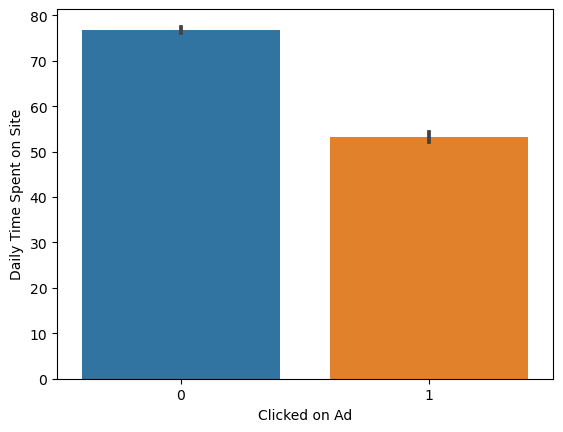

In [426]:
sns.barplot(x='Clicked on Ad',y='Daily Time Spent on Site',data=df)

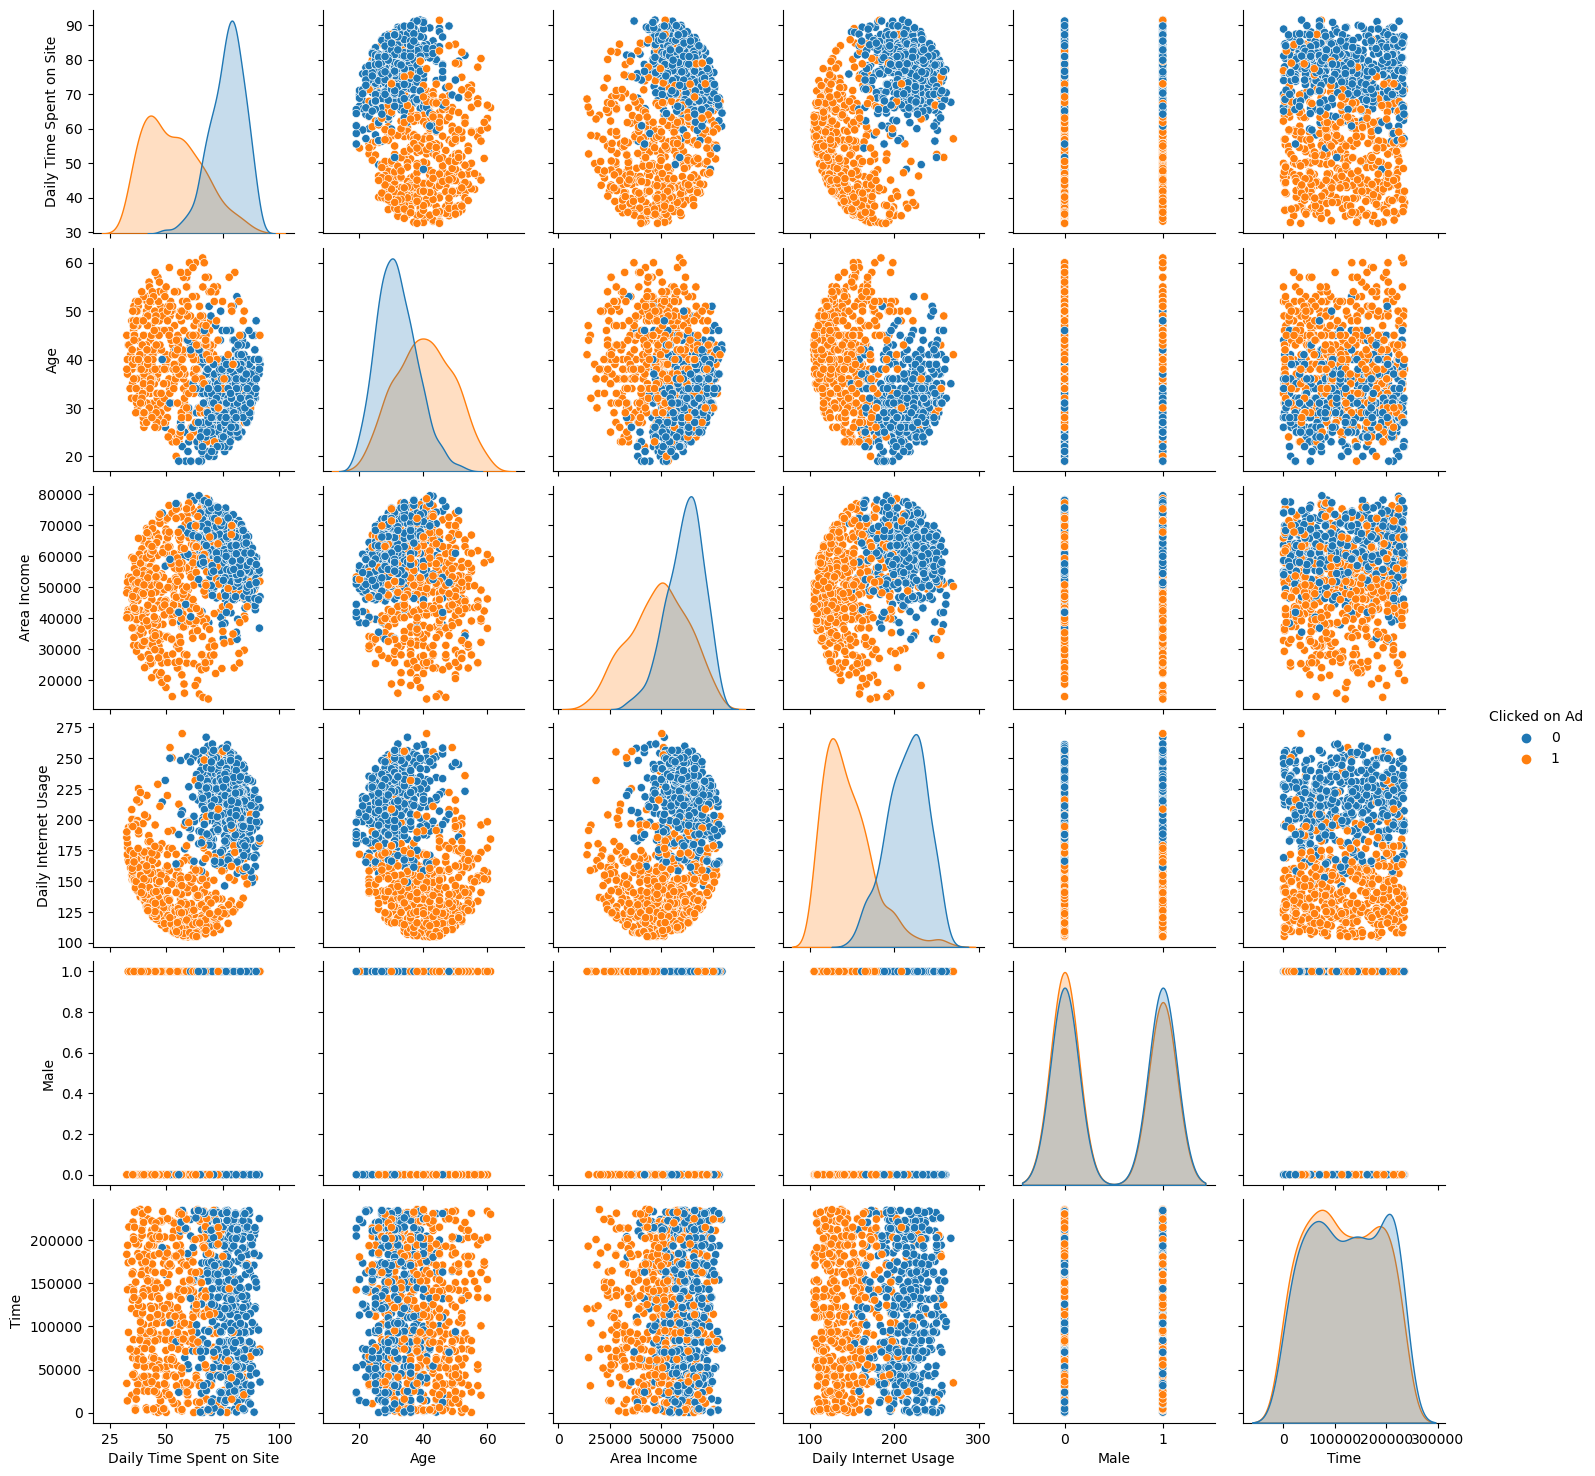

In [428]:
sns.pairplot(df,hue='Clicked on Ad')

<Axes: xlabel='Clicked on Ad', ylabel='Area Income'>

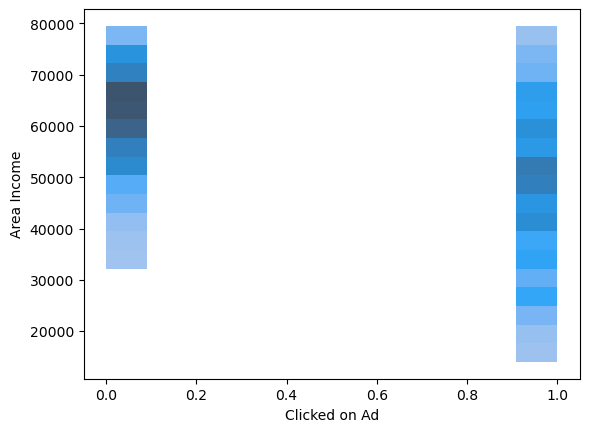

In [433]:
sns.histplot(x='Clicked on Ad',y='Area Income',data=df)

In [344]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ibrahim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [345]:
stop = stopwords.words('english')

In [346]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [347]:
from sklearn.feature_extraction.text import CountVectorizer

In [348]:
cv = CountVectorizer()

In [349]:
courps = []

for i in range(len(df)):
    a= re.sub('[^a-zA-Z]'," ",df['Ad Topic Line'][i])
    a = a.lower()
    a=a.split()
    a = [words for words in a if words not in stop]
    a = ' '.join(a)
    a = ps.stem(a)
    courps.append(a)

courps

['cloned thgeneration orchestr',
 'monitored national standard',
 'organic bottom line service desk',
 'triple buffered reciprocal time fram',
 'robust logistical util',
 'sharable client driven softwar',
 'enhanced dedicated support',
 'reactive local challeng',
 'configurable coherent funct',
 'mandatory homogeneous architectur',
 'centralized neutral neural net',
 'team oriented grid enabled local area network',
 'centralized content based focus group',
 'synergistic fresh thinking array',
 'grass roots coherent extranet',
 'persistent demand driven interfac',
 'customizable multi tasking websit',
 'intuitive dynamic attitud',
 'grass roots solution oriented conglomer',
 'advanced product',
 'object based reciprocal knowledgebas',
 'streamlined non volatile analyz',
 'mandatory disintermediate util',
 'future proofed methodical protocol',
 'exclusive neutral parallel',
 'public key foreground groupwar',
 'ameliorated client driven forecast',
 'monitored systematic hierarchi',
 'open

In [350]:
a= cv.fit_transform(courps).toarray()

In [351]:
a.shape

(1000, 337)

In [352]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [354]:
a = df['Timestamp'][1]
a

'2016-04-04 01:39:02'

In [355]:
df[['Date', 'Time']] = df.Timestamp.str.split(" ", expand = True)

In [356]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Date,Time
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,2016-03-27,00:53:11
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,2016-04-04,01:39:02
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,2016-03-13,20:35:42
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2016-01-10,02:31:19
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,2016-06-03,03:36:18


In [357]:
df= df.drop('Date', axis = 1 )
df= df.drop('City', axis = 1 )
df= df.drop('Country', axis = 1 )

df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,Male,Timestamp,Clicked on Ad,Time
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,0,2016-03-27 00:53:11,0,00:53:11
1,80.23,31,68441.85,193.77,Monitored national standardization,1,2016-04-04 01:39:02,0,01:39:02
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,0,2016-03-13 20:35:42,0,20:35:42
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,1,2016-01-10 02:31:19,0,02:31:19
4,68.37,35,73889.99,225.58,Robust logistical utilization,0,2016-06-03 03:36:18,0,03:36:18


In [358]:
df= df.drop('Timestamp', axis = 1 )

In [359]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,Male,Clicked on Ad,Time
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,0,0,00:53:11
1,80.23,31,68441.85,193.77,Monitored national standardization,1,0,01:39:02
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,0,0,20:35:42
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,1,0,02:31:19
4,68.37,35,73889.99,225.58,Robust logistical utilization,0,0,03:36:18


In [360]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,Male,Clicked on Ad,Time
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,0,0,00:53:11
1,80.23,31,68441.85,193.77,Monitored national standardization,1,0,01:39:02
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,0,0,20:35:42
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,1,0,02:31:19
4,68.37,35,73889.99,225.58,Robust logistical utilization,0,0,03:36:18


In [361]:
df['Time'][1]

'01:39:02'

In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   Male                      1000 non-null   int64  
 6   Clicked on Ad             1000 non-null   int64  
 7   Time                      1000 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 62.6+ KB


In [363]:
df["Time"] = pd.to_datetime(df["Time"]).dt.strftime('%H%M%S')


In [364]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,Male,Clicked on Ad,Time
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,0,0,005311
1,80.23,31,68441.85,193.77,Monitored national standardization,1,0,013902
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,0,0,203542
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,1,0,023119
4,68.37,35,73889.99,225.58,Robust logistical utilization,0,0,033618


In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   Male                      1000 non-null   int64  
 6   Clicked on Ad             1000 non-null   int64  
 7   Time                      1000 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 62.6+ KB


In [366]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
Male                        0
Clicked on Ad               0
Time                        0
dtype: int64

In [367]:
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
Male                        0
Clicked on Ad               0
Time                        0
dtype: int64

In [368]:
df['Time'] = df['Time'].astype(int)

In [369]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,Male,Clicked on Ad,Time
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,0,0,5311
1,80.23,31,68441.85,193.77,Monitored national standardization,1,0,13902
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,0,0,203542
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,1,0,23119
4,68.37,35,73889.99,225.58,Robust logistical utilization,0,0,33618


In [468]:
numerical_features = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male', 'Time']
X_numerical = df[numerical_features].values
X_numerical

array([[6.895000e+01, 3.500000e+01, 6.183390e+04, 2.560900e+02,
        0.000000e+00, 5.311000e+03],
       [8.023000e+01, 3.100000e+01, 6.844185e+04, 1.937700e+02,
        1.000000e+00, 1.390200e+04],
       [6.947000e+01, 2.600000e+01, 5.978594e+04, 2.365000e+02,
        0.000000e+00, 2.035420e+05],
       ...,
       [5.163000e+01, 5.100000e+01, 4.241572e+04, 1.203700e+02,
        1.000000e+00, 1.724570e+05],
       [5.555000e+01, 1.900000e+01, 4.192079e+04, 1.879500e+02,
        0.000000e+00, 2.355400e+04],
       [4.501000e+01, 2.600000e+01, 2.987580e+04, 1.783500e+02,
        0.000000e+00, 2.143210e+05]])

In [375]:
y = df['Clicked on Ad']
y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64

In [443]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_text = vectorizer.fit_transform(courps)
X_text

<1000x337 sparse matrix of type '<class 'numpy.float64'>'
	with 3888 stored elements in Compressed Sparse Row format>

In [382]:
X_combined = np.hstack((X_numerical, X_text.toarray()))


In [383]:
X_combined


array([[6.895000e+01, 3.500000e+01, 6.183390e+04, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [8.023000e+01, 3.100000e+01, 6.844185e+04, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [6.947000e+01, 2.600000e+01, 5.978594e+04, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [5.163000e+01, 5.100000e+01, 4.241572e+04, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [5.555000e+01, 1.900000e+01, 4.192079e+04, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [4.501000e+01, 2.600000e+01, 2.987580e+04, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]])

In [385]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.33, random_state=42)


In [386]:
model = RandomForestClassifier()

In [387]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [389]:
Y_pred = model.predict(X_test)

In [390]:
score = accuracy_score(y_test, Y_pred)

In [391]:
score

0.9424242424242424

In [405]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,Y_pred))
print(confusion_matrix(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       162
           1       0.95      0.93      0.94       168

    accuracy                           0.94       330
   macro avg       0.94      0.94      0.94       330
weighted avg       0.94      0.94      0.94       330

[[154   8]
 [ 11 157]]


In [525]:

# Sample new input
new_numerical_data = [61.0, 21, 51111.0, 180.0, 0, 200]  # Adjusted values

# Convert the text feature 'example' into its TF-IDF representation using the same vectorizer
new_text_data = ['svd vsdf']  # Adjusted text
new_text_data_transformed = vectorizer.transform(new_text_data).toarray()

# Ensure the new text data has the same number of features as the original text data
if new_text_data_transformed.shape[1] < X_text.shape[1]:
    new_text_data_transformed = np.hstack((
        new_text_data_transformed, np.zeros((new_text_data_transformed.shape[0], X_text.shape[1] - new_text_data_transformed.shape[1]))
    ))

# Combine numerical and text features
new_combined_data = np.hstack((new_numerical_data, new_text_data_transformed.flatten()))

# Predict using the trained model
predicted_label = model.predict([new_combined_data])

print("Predicted Label:", predicted_label)



Predicted Label: [1]
